# Stock Price Analysis
**Question:**  Using historical stock price data for multiple companies, create an interactive plot to analyze trends and patterns over time. Include the following features:

- Line plots for stock prices of three different companies over a year.
- Highlight significant events or anomalies with annotations.
- Add a moving average line to smooth out short-term fluctuations and highlight longer-term trends.

**Hint:** Use pd.read_csv() to load the data, plt.plot() for line plots, and plt.annotate() for annotations. Use rolling means from pandas for moving averages.

**Expectation:** An interactive plot showing stock price trends with annotations for significant events and a moving average line for trend analysis.

[*********************100%%**********************]  3 of 3 completed

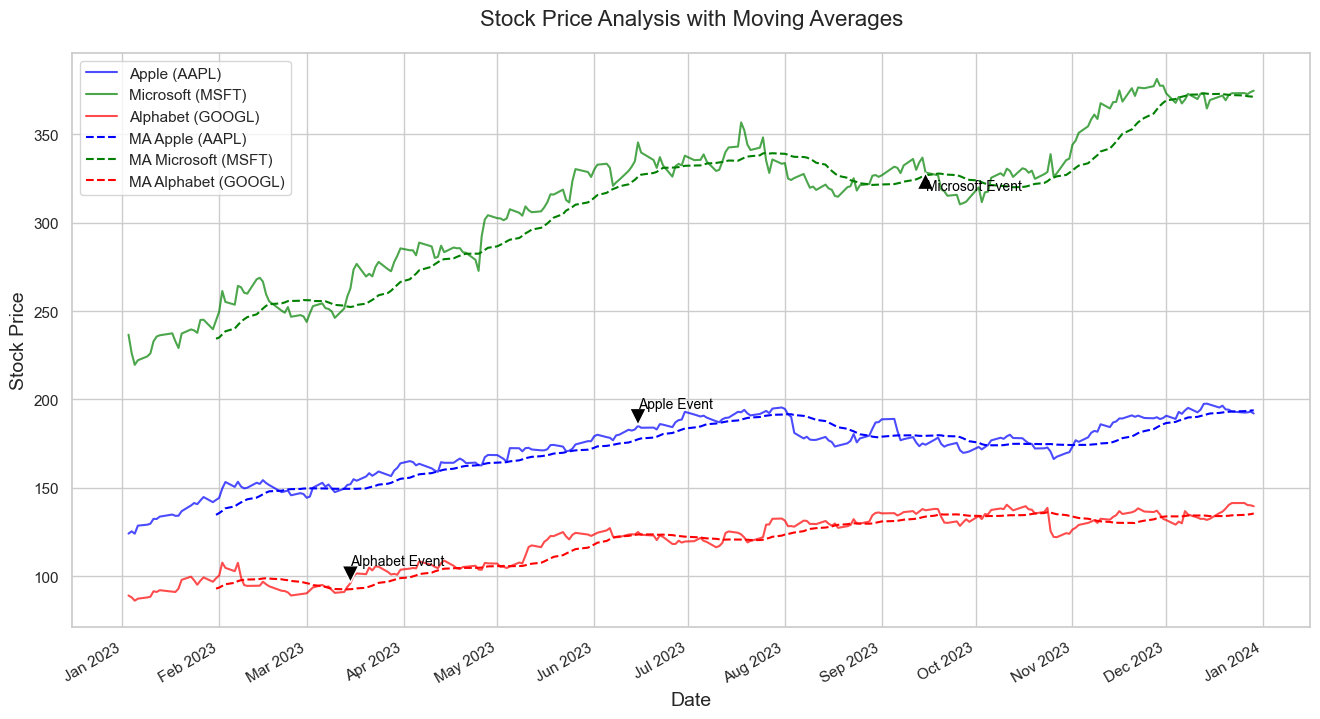

In [14]:
# Install and import the required libraries and modules
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Download historical stock data for Apple, Microsoft, and Alphabet
tickers = ['AAPL', 'MSFT', 'GOOGL']
start_date = '2023-01-01'
end_date = '2023-12-31'

data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Save the data to CSV
data.to_csv('historical_stock_prices.csv')

# Read the data
df = pd.read_csv('historical_stock_prices.csv', parse_dates=['Date'], index_col='Date')

# Calculate the moving averages
df['MA_AAPL'] = df['AAPL'].rolling(window=20).mean()
df['MA_MSFT'] = df['MSFT'].rolling(window=20).mean()
df['MA_GOOGL'] = df['GOOGL'].rolling(window=20).mean()

# Plotting
plt.figure(figsize=(14, 8))

# Plot stock prices
plt.plot(df.index, df['AAPL'], label='Apple (AAPL)', alpha=0.7, color='blue')
plt.plot(df.index, df['MSFT'], label='Microsoft (MSFT)', alpha=0.7, color='green')
plt.plot(df.index, df['GOOGL'], label='Alphabet (GOOGL)', alpha=0.7, color='red')

# Plot moving averages
plt.plot(df.index, df['MA_AAPL'], label='MA Apple (AAPL)', linestyle='--', color='blue')
plt.plot(df.index, df['MA_MSFT'], label='MA Microsoft (MSFT)', linestyle='--', color='green')
plt.plot(df.index, df['MA_GOOGL'], label='MA Alphabet (GOOGL)', linestyle='--', color='red')

# Highlight significant events (example events)
event_dates = pd.to_datetime(['2023-06-15', '2023-09-15', '2023-03-15'])
event_labels = ['Apple Event', 'Microsoft Event', 'Alphabet Event']

for date, label in zip(event_dates, event_labels):
    y_value = df.loc[date, 'AAPL'] if label == 'Apple Event' else (df.loc[date, 'MSFT'] if label == 'Microsoft Event' else df.loc[date, 'GOOGL'])
    plt.annotate(label, xy=(date, y_value),
                 xytext=(date, y_value + 10 if y_value < df[['AAPL', 'MSFT', 'GOOGL']].max().max() * 0.8 else y_value - 10),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=10, color='black')

# Formatting date on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.gcf().autofmt_xdate()

# Labels and legend
plt.xlabel('Date', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.title('Stock Price Analysis with Moving Averages', fontsize=16, pad=20)
plt.legend()
plt.grid(True)
plt.tight_layout(pad=3.0)

# Show the plot
plt.show()
